In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Course reminder

### Motivation:

Many machine learning problems, whether they be supervised or unsupervised, write as follows:

\begin{equation*}
\min_{f\in \mathcal{F}} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i)) + \lambda \Omega(f)
\end{equation*}

for some hypothesis space $\mathcal{F}$ and some regularization $\Omega$.

Kernel methods allow to manipulate hypothesis spaces that are not only Hilbert Spaces but also enjoy the so-called reproducing property.

### Kernels and RKHS:

As seen in the lecture, let us define a positive definite symmetric kernel $k : \mathbb{R}^d \times \mathbb{R}^d \mapsto \mathbb{R}$.
Denote $\mathcal{H}_k$ its associated Reproducing Kernel Hilbert space ($\mathcal{H}$, $\langle \cdot, \cdot \rangle_{\mathcal{H}_k}$).

Let us recall that the following properties: for any $x\in \mathbb{R}^d$, we have:

$k(\cdot, x) \in \mathcal{H}_k$ \\
for any $f \in \mathcal{H}_k$,~$f(x) = \langle f, k(\cdot,x) \rangle_{\mathcal{H}_k}$

In praticular, $k(x,z) = \langle k(\cdot, x), k(\cdot, z) \rangle_{\mathcal{H}_k}$

In the remaining part of the document, we use refer to $k(\cdot, x)$ as the canonical feature map defined as:      
\begin{equation*}
\phi(x) = k(\cdot, x)
\end{equation*}

Learning within RKHSs means that we choose as hypothesis space this functional space. An interesting choice for $k$ is to pick up the Gaussian kernel:
\begin{equation*}
k(x,z)= \exp(-\gamma \| x - z\|^2).
\end{equation*}
    
Indeed, the Gaussian kernel is said to be universal, i.e. the associated RKHS $\mathcal{H}_k$ is dense into the space of continuous real-valued functions.



# I. Basic kernel manipulations

Notations:

- $x_1,\ldots,x_n$ are the training point in $\mathbb{R}^d$.
- The matrix $X$ is defined as $X = [x_1^T,...,x_n^T]$
- Similarly $z_1,...,z_m$ are the test points and $Z = [z_1^T,...,z_m^T]$
- We denote $K^{xx}$ the gram matrix of the train set that is $K^{xx}_{i,j} = k(x_i,x_j)$. When there is no ambiguity we simply denote it $K$.
- We denote $K^{xz}$ the train/test product matrix that is $K^{xz}_{i,j} = k(x_i,z_j)$

Q1) Prove that the linear kernel is a kernel

$$k(x,y) = \langle x, y \rangle$$


### **Answer:**

We use the symmetry of the inner product:

$$
k(x, y) = \langle x, y \rangle = \langle y, x \rangle = k(y, x)
$$

Then, the linear kernel is symmetric.


Let $x_1, \dots, x_n \in \mathbb{R}^d$.

Let $\alpha \in \mathbb{R}^n$, then:
$$
\sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle x_i, x_j \rangle
= \left\langle \sum_{i=1}^n \alpha_i x_i, \sum_{j=1}^n \alpha_j x_j \right\rangle
= \left\| \sum_{i=1}^n \alpha_i x_i \right\|^2 \geq 0
$$

This shows the kernel matrix is PSD.

Finally, we can conclude the linear kernel is a kernel.

---

The most popular/common kernel is the gaussian kernel

$$k(x,y) = \exp\left(-\frac{||x-y||_2^2}{\sigma^2}\right)$$

Q2) Let us prove that this is a valid kernel as well. Assume $d=1$ and $\sigma = 1$ to simplify.

- Step 1: Prove that $k(x,y) = (xy)^k$ is a kernel
- Step 2: use that a linear combinaison of kernels is kernel to prove that $k(x,y) = \sum_{k=0}^n (xy)^k$ is a kernel
- Step 3: use that a limit of kernels is kernel to prove that $k(x,y) = \exp(xy)$ is a kernel
- Step 4: conclude

### **Answer:**

- Step 1
$$
k(x, y) = (xy)^k = (x^k)(y^k) = (y^k)(x^k) = (yx)^k = k(y, x)
$$

So, k(x,y) is symmetric.

Let $x_1, ..., x_n \in \mathbb{R}^d$, and let $c_1, ..., c_n \in \mathbb{R}^d$.

Then:

$$\sum_{i=1}^n \sum_{j=1}^n c_i c_j (x_i x_j)^k
= (\sum_{i=1}^n c_i x_i)(\sum_{j=1}^n c_j x_j)
= (\sum_{i=1}^n c_i x_i)^2 \geq 0$$
So the kernel matrix is PSD.

Finally, I have proven that $k(x,y) = (xy)^k$ is a kernel.

- Step 2

A linear combinaison of kernels is kernel. Hence, $k(x,y) = \sum_{k=0}^n (xy)^k$ is a kernel.

- Step 3

A linear combinaison of kernels is kernel. Hence, $k_n(x, y) = \sum_{k=0}^{n} \frac{(xy)^k}{k!}$ is a kernel.

From the definition of the exponential function:
$$
\exp(xy) = \sum_{k=0}^{\infty} \frac{(xy)^k}{k!} = \lim_{n \to \infty} k_n(x, y)
$$

Since each $k_n$ is a valid kernel and the series converges pointwise for all $x, y \in \mathbb{R}$, it follows that:

$k(x, y) = \exp(xy)$ is a valid kernel.

- Step 4

$$k(x,y) = \exp\left(-\frac{||x-y||_2^2}{\sigma^2}\right)$$

$$
k(x, y) = \exp\left(-\frac{x^2 + y^2 - 2xy}{\sigma^2}\right)
$$

$$
k(x, y) = \exp\left(-\frac{x^2}{\sigma^2}\right) \cdot \exp\left(-\frac{y^2}{\sigma^2}\right) \cdot \exp\left(\frac{2xy}{\sigma^2}\right)
$$

Each exponentiel term is a kernel thanks to step 3.

Finally, as a product of kernels is a kernel, I have that shown that the gaussian kernel is a kernel.

---


Q3) For any $f \in \mathcal{H}$ of the form  $f = \sum_{i=1}^n \alpha_i \phi(x_i)$,  compute $||f||_\mathcal{H}^2$. Compute the expressions of:

- The norm: $||f||_\mathcal{H}^2$. It should depend only on $K$ and $\alpha$.
- The train prediction vector: $[f(x_1),...,f(x_n)]$. Idem.
- The test prediction vector: $[f(z_1),...,f(z_m)]$. It should depend only on $K^{x,z}$ and $\alpha$.

### **Answer:**

- The norm: $\|f\|_{\mathcal{H}}^2$

The norm in the RKHS is defined as:
$$
\|f\|_{\mathcal{H}}^2 = \left\langle \sum_{i=1}^n \alpha_i \phi(x_i), \sum_{j=1}^n \alpha_j \phi(x_j) \right\rangle_{\mathcal{H}}
= \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle \phi(x_i), \phi(x_j) \rangle
= \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j k(x_i, x_j)
$$

This can be written in matrix form as:
$$
\|f\|_{\mathcal{H}}^2 = \alpha^\top K \alpha
$$

where $K \in \mathbb{R}^{n \times n}$ is the Gram matrix with entries $K_{ij} = k(x_i, x_j)$.


- The train prediction vector: $[f(x_1), \dots, f(x_n)]$

We compute:
$$
f(x_j) = \sum_{i=1}^n \alpha_i \langle \phi(x_i), \phi(x_j) \rangle = \sum_{i=1}^n \alpha_i k(x_i, x_j) = \sum_{i=1}^n K_{j,i} \alpha_i  
$$

So, the full prediction vector on the training data is:
$$
f_{\text{train}} = K \alpha \in \mathbb{R}^n
$$


- The test prediction vector: $[f(z_1), \dots, f(z_m)]$

Let $z_1, \dots, z_m \in \mathbb{R}^d$. Then:
$$
f(z_j) = \sum_{i=1}^n \alpha_i \langle \phi(x_i), \phi(z_j) \rangle = \sum_{i=1}^n \alpha_i k(x_i, z_j) = \sum_{i=1}^n (K^{x,z}_{j,i})^T \alpha_i  
$$

Finally, the test prediction vector is:
$$
f_{\text{test}} =  K^{x, z^\top} \alpha \in \mathbb{R}^m
$$


**Summary**

- RKHS norm: $\|f\|_{\mathcal{H}}^2 = \alpha^\top K \alpha$
- Train predictions: $[f(x_1), \dots, f(x_n)] = K \alpha$
- Test predictions: $[f(z_1), \dots, f(z_m)] = K^{x, z^\top} \alpha $

---

Q4) Complete the following code (application of the previous questions)

In [2]:
class Kernel():

    def compute_norm_f(self, Kxx, alpha):
        '''
        Input:
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            norm_f: float
        '''

        norm_f = alpha.T @ Kxx @ alpha

        return norm_f

    def compute_prediction_train(self, Kxx, alpha):
        '''
        Input:
            Kxx: numpy array of shape (n, n)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (n)
        '''

        y = Kxx @ alpha

        return y

    def compute_prediction_test(self, Kxz, alpha):
        '''
        Input:
            Kxz: numpy array of shape (n, m)
            alpha: numpy array of shape (n)
        Output:
            y: numpy array of shape (m)
        '''

        y = Kxz.T @ alpha

        return y


class GaussianKernel(Kernel):

    def __init__(self, sigma = 1):
        self.sigma = sigma

    def get_Kxx(self, X):
        '''
        Input:
            X: numpy array of shape (n, d)
        Output:
            Kxx: gnumpy array of shape (n, n)
        '''
        sq_norms = np.sum(X**2, axis=1).reshape(-1, 1)
        dist = sq_norms + sq_norms.T - 2 * X @ X.T
        Kxx = np.exp(-dist / self.sigma**2)

        return Kxx

    def get_Kxz(self, X, Z):
        '''
        Input:
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: gnumpy array of shape (n, m)
        '''
        X_norm = np.sum(X**2, axis=1).reshape(-1, 1)  # (n, 1)
        Z_norm = np.sum(Z**2, axis=1).reshape(1, -1)  # (1, m)
        dist_sq = X_norm + Z_norm - 2 * X @ Z.T
        Kxz = np.exp(-dist_sq / self.sigma**2)

        return Kxz

class LinearKernel(Kernel):

    def __init__(self):
        pass

    def get_Kxx(self, X):
        '''
        Input:
            X: numpy array of shape (n, d)
        Output:
            Kxx: gnumpy array of shape (n, n)
        '''

        Kxx = X @ X.T

        return Kxx

    def get_Kxz(self, X, Z):
        '''
        Input:
            X: numpy array of shape (n, d)
            Z: numpy array of shape (m, d)
        Output:
            Kxz: gnumpy array of shape (n, m)
        '''

        Kxz = X @ Z.T

        return Kxz

# II. Centering data in a RKHS

Many ML algorithm expect the data to be centered i.e. $\overline{x} = \frac{1}{n} \sum_{i=1}^n x_i = 0$. When it is not the case we simply define a new centered dataset

$$ x_i' = x_i - \overline{x}$$



Simarly, in kernel methods we often expect the data to be centered in the RKHS that is $ \overline{\phi} = \frac{1}{n} \sum_{i=1}^n \phi(x_i) = 0$. We can once again define some new data that is centered:

$$ \phi_i = \phi(x_i) - \overline{\phi}$$

The only difficulty is that the new points in the feature space might not correspond to any point in the original space i.e. they might not be any $x_i'$ such that $\phi(x_i') = \phi_i$.

Is it a problem ? No ! Remember that the strenght of the kernels methods is that we only need to compute the gram matrix to apply them.

Q1) Compute $\langle \phi_k,\phi_l \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$

### **Answer:**

I developp the inner product:

$ \langle \phi_k, \phi_l \rangle_{\mathcal{H}} = \langle \phi(x_k) - \bar{\phi},\ \phi(x_l) - \bar{\phi} \rangle_{\mathcal{H}} $

$ \langle \phi_k, \phi_l \rangle_{\mathcal{H}} = \langle \phi(x_k), \phi(x_l) \rangle - \langle \phi(x_k), \bar{\phi} \rangle - \langle \bar{\phi}, \phi(x_l) \rangle + \langle \bar{\phi}, \bar{\phi} \rangle $

$ \langle \phi_k, \phi_l \rangle_{\mathcal{H}} = \langle \phi(x_k), \phi(x_l) \rangle - \frac{1}{n} \sum_{j=1}^n \langle \phi(x_k), \phi(x_j) \rangle - \frac{1}{n} \sum_{i=1}^n \langle \phi(x_i), \phi(x_l) \rangle + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \langle \phi(x_i), \phi(x_j) \rangle $

Hence:

$$ \langle \phi_k, \phi_l \rangle_{\mathcal{H}} = k(x_k, x_l) - \frac{1}{n} \sum_{j=1}^n k(x_k, x_j) - \frac{1}{n} \sum_{i=1}^n k(x_i, x_l) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j) $$

---

Q2) Give an expression of $K_c$ the gram matrix of the $\phi_i$ using only matrix multiplications, the original gram matrix $K$ and $\mathbf{1}_n$ the $n\times n$ matrix full of ones.

### **Answer:**

I can observe:

$ (K 1_n)_{k,l} = \sum_{j=1}^n k(x_k, x_j) $

$ (1_n K)_{k,l} = \sum_{i=1}^n k(x_i, x_l) $

$ (1_n K 1_n)_{k,l} = \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j) $

Thanks to question 1:

$ (K_c)_{k,l} = (K)_{k,l} - \frac{1}{n} (K 1_n)_{k,l} - \frac{1}{n} (1_n K)_{k,l} + \frac{1}{n^2} (1_n K 1_n)_{k,l} $

Hence:

$$ K_c = K - \frac{1}{n} K 1_n - \frac{1}{n} 1_n K + \frac{1}{n^2} 1_n K 1_n $$

---

Q3) Lets now assume that we want to center the test set (using the same mean !). That is we define

$$\phi_i' = \phi(z_i) - \overline{\phi}$$

Compute the $\langle \phi_k', \phi_l \rangle_\mathcal{H}$ as a function of the $k(x_i,x_j)$ and $k(x_i,z_j)$.

### **Answer:**

I developp the inner product:

$$ \langle \phi_k', \phi_l \rangle_{\mathcal{H}} = \langle \phi(z_k) - \bar{\phi},\ \phi(x_l) - \bar{\phi} \rangle_{\mathcal{H}} $$

$$ \langle \phi_k', \phi_l \rangle_{\mathcal{H}} = \langle \phi(z_k), \phi(x_l) \rangle - \langle \phi(z_k), \bar{\phi} \rangle - \langle \bar{\phi}, \phi(x_l) \rangle + \langle \bar{\phi}, \bar{\phi} \rangle $$

$$ \langle \phi_k', \phi_l \rangle_{\mathcal{H}} = \langle \phi(z_k), \phi(x_l) \rangle - \frac{1}{n} \sum_{i=1}^n \langle \phi(z_k), \phi(x_i) \rangle - \frac{1}{n} \sum_{i=1}^n \langle \phi(x_i), \phi(x_l) \rangle + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \langle \phi(x_i), \phi(x_j) \rangle $$

Hence:

$$ \langle \phi_k', \phi_l \rangle_{\mathcal{H}} = k(x_l, z_k) - \frac{1}{n} \sum_{i=1}^n k(x_i, z_k) - \frac{1}{n} \sum_{i=1}^n k(x_i, x_l) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j) $$

---

Q4) Give an expression of $K^{x,z}_c$ the gram matrix of the $\langle \phi_k', \phi_l \rangle_\mathcal{H}$ using $K^{x,x}, K^{x,z}$ and $\mathbf{1}_n$.

### **Answer:**

As $K_c^{xz}$ is a $n * m$ matrix, we have $(K_c^{xz})_{l,k} = \langle \phi_k', \phi_l \rangle_{\mathcal{H}}$.

Thanks to question 3):

$$ (K_c^{xz})_{l,k}  = k(x_l, z_k) - \frac{1}{n} \sum_{i=1}^n k(x_i, z_k) - \frac{1}{n} \sum_{i=1}^n k(x_l, x_i) + \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n k(x_i, x_j) $$

$$ (K_c^{xz})_{l,k} = (K^{xz})_{l,k} - \frac{1}{n} (\mathbf{1}_n K^{x,z})_{l,k} - \frac{1}{n} (K^{xx} 1_{(n,m)})_{l,k} + \frac{1}{n^2} (1_n K^{xx} 1_{(n,m)})_{l,k} $$

The final formula is then:

$$
K^{x,z}_c = K^{x,z}
- \frac{1}{n} \mathbf{1}_n K^{x,z}
- \frac{1}{n} K^{x,x} \mathbf1_{(n,m)}
+ \frac{1}{n^2} \mathbf{1}_n K^{x,x} \mathbf1_{(n,m)}
$$

---

Q5) Complete the following code

In [3]:
def center_train_gram_matrix(Kxx):
    '''
    Input:
        Kxx: numpy array of shape (n, n)
    Output:
        Kxx_c: numpy array of shape (n, n)
    '''
    n = Kxx.shape[0]
    ones_n = np.ones((n, n))
    Kxx_c = Kxx - (1/n) * ones_n @ Kxx - (1/n) * Kxx @ ones_n + (1/n**2) * ones_n @ Kxx @ ones_n

    return Kxx_c

def center_test_gram_matrix(Kxx, Kxz):
    '''
    Input:
        Kxx: numpy array of shape (n, n)
        Kxz: numpy array of shape (n, m)
    Output:
        K_c: numpy array of shape (n, m)
    '''

    n, m = Kxz.shape

    ones_n = np.ones((n, n))
    ones_nm = np.ones((n, m))

    Kxz_c = Kxz - (1/n) * ones_n @ Kxz - (1/n) * Kxx @ ones_nm + (1/n**2) * ones_n @ Kxx @ ones_nm

    return Kxz_c

# III. Kernel PCA

## Reminder on PCA:


$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$

PCA is an unsupervised Machine Learning technique that learns a low-dimentional representation of the data.


We have a set $x_1,\ldots, x_n$ of vectors in $\RR^d$.

We project them to a lower dimention subspace spanned by the orthonormal vectors $v_1,\ldots,  v_m$.
For a single vector $x$, the projection is
$$
 P_V(x_i) = \sum_{i=1}^m \pair{x, v_i} v_i
$$
In matrix form, the orthogonal projection onto the span of $v$ is

$$
 P_V = V^TV
$$
where
$
 V = \lbrack v_1, \dots,  v_m \rbrack^T
$
satisfies $VV^T = I_m$. (since the $v_j$ are orthonormal).

In PCA, we try to find a subspace of dimension $m$ such that the projection on this subspace is as close as possible to the original data, that is we solve:

$$
\min_{V} \frac{1}{2}\norm{X - V^TVX}^2
$$
over the orthonormal matrices $V$.
Apply pythagoria's theorem to split the norm:
$$
\frac{1}{2}\norm{X - V^TVX}^2 = \quad \frac{1}{2}\norm{X}^2 + \frac{1}{2}\norm{V^TV X}^2 - \pair{X, V^TVX}.
$$

The first term is constant with respect to $V$.
The second term is equal to $(1/2)\norm{V X}^2$ by isometry, and the last term
is $-\norm{VX}^2$.

Therfore the objective is also
$$
    \max_{V} \norm{VX}^2 = \max_{V} \trace{VX^TXV^T}
$$

We can show that in the last expression that $V$ is the top $m$-components of the
eigen decomposition of $XX^T$.

## PCA in a RKHS

$\def\norm#1{\|#1\|}\def\pair#1{\langle #1 \rangle}\def\set#1{\lbrace#1\rbrace}$
$\def\RR{\mathbf{R}}$
$\def\trace{\operatorname{trace}}$
$\def\XX{\mathcal{X}}\def\HH{\mathcal{H}_k}$

We can proceed as before except that we try to find a $m$ dimensional representation of the vectors in the RKHS $\phi(x_1),...,\phi(x_n)$. The only difficulty is that those vectors are of infinite dimensions.

Let's first focus on the projection over a single vector ($m=1$). For a  unitary vector $f\in \HH$, $\norm{f}^2_{\mathcal{H}_k} = 1$, we can still define the projection
$$
P_f: \HH\to \HH ,\ g \mapsto \pair {g, f}_{\mathcal{H}_k}f
$$
And the optimal vector is
$$
f^* = \arg \min_{f \in \HH, \| f\|_{\HH} = 1} \sum_{i=1}^n || P_f(\phi(x_i)) - \phi(x_i)||_{\HH}^2
$$

Q1) Prove that

$$
f^* = \arg \max_{f \in \HH, \|f\|_{\HH} = 1} \sum_{i=1}^n f(x_i)^2
$$

(Tip: remember the reproducing property !)

### **Answer:**

In a RKHS, the orthogonal projection of $\phi(x_i)$ onto $f$ is:

$$
P_f(\phi(x_i)) = \langle \phi(x_i), f \rangle_{\mathcal{H}_k} f = f(x_i) f
$$

Compute the squared projection error:

$$
\|P_f(\phi(x_i)) - \phi(x_i)\|^2 = \|f(x_i)f - \phi(x_i)\|^2
$$

$$
\|P_f(\phi(x_i)) - \phi(x_i)\|^2 = f(x_i)^2\|f\|^2 - 2 f(x_i)\langle f, \phi(x_i) \rangle_{\mathcal{H}_k} + \|\phi(x_i)\|^2
$$

Thanks to the reproducing property: $ f(x_i) = \langle f, \phi(x_i) \rangle_{\mathcal{H}_k} $.

As $\|f\|^2 = 1$, we get then the final expression for squared projection error:

$$
\|P_f(\phi(x_i)) - \phi(x_i)\|^2 = \|\phi(x_i)\|^2 - f(x_i)^2
$$

Sum over all $i$:

$$
\sum_{i=1}^n \|P_f(\phi(x_i)) - \phi(x_i)\|^2 = \sum_{i=1}^n \|\phi(x_i)\|^2 - \sum_{i=1}^n f(x_i)^2
$$

Since $\sum \|\phi(x_i)\|^2$ does not depend on $f$, minimizing the total error is equivalent to maximizing:

$$
\sum_{i=1}^n f(x_i)^2
$$

Hence:

$$
f^* = \arg \max_{\|f\| = 1} \sum_i f(x_i)^2
$$

---

Q2) Let's prove a variant of the representer theorem for this new optimization problem. We split $\HH$ into the span of the $\phi(x_1),\ldots,\phi(x_n)$ and its complement, that is for each $f \in \mathcal{H}$ we denote

$$ f = f_X + f_\bot$$

where $f_X = \sum \alpha_i \phi(x_i)$ and $\langle f_\bot, f_X \rangle = 0$.

Prove the representer theorem i.e. that the optimal $f$ satisfies $f = f_X$.

### **Answer:**

$\quad \forall i, \langle f_\perp, \phi(x_i) \rangle = 0 $

So:

$$
f(x_i) = \langle f, \phi(x_i) \rangle = \langle f_X, \phi(x_i) \rangle + \underbrace{\langle f_\perp, \phi(x_i) \rangle}_{=0} = f_X(x_i)
$$

Sum over all i:

$$
\sum_{i=1}^n f(x_i)^2 = \sum_{i=1}^n f_X(x_i)^2
$$

which is independent of $f_\perp$.

Now since $\|f\|^2 = \|f_X\|^2 + \|f_\perp\|^2 \geq \|f_X\|^2$, the norm constraint $\|f\| = 1$ implies that $\|f_X\| \leq 1$.

I am now going to show that $f_\perp = 0$.

By absurd, suppose the optimum is achieved for some $f = f_X + f_\perp$ with $f_\perp \ne 0$.

I have:

$$
\|f\|^2 = \|f_X\|^2 + \|f_\perp\|^2 > \|f_X\|^2
$$

I can normalize $f_X$ to:

$$
\tilde{f}_X = \frac{f_X}{\|f_X\|}, \quad \text{so that } \|\tilde{f}_X\| = 1
$$

Then, because $\frac{1}{\|f_X\|^2} > 1$:

$$
\sum_i \tilde{f}_X(x_i)^2 = \frac{1}{\|f_X\|^2} \sum_i f_X(x_i)^2 > \sum_i f_X(x_i)^2 = \sum_i f(x_i)^2
$$

This **contradicts** the optimality of $f$.

To maximize the quantity $\sum f(x_i)^2$ under norm constraint, we must take:

$$
f_\perp = 0 \quad \Rightarrow \quad f = f_X
$$

To conclude:

The optimal $f$ lies in the span of $\phi(x_i)$, i.e.,

$$
f^* = f_X = \sum_{i=1}^n \alpha_i \phi(x_i)
$$

---

Q3) Apply the representer theorem to get a optimization problem over $\alpha \in \mathbb{R}^n$. As always the problem should depend only on $\alpha$ and the kernel matrix $K$.

### **Answer:**
Thanks to the previous question, we know that the optimal $f \in \mathcal{H}_k$ can be written as:

$$
f = \sum_{i=1}^n \alpha_i \phi(x_i)
$$



Then, the constraint becomes:

$$\|f\|_{\mathcal{H}_k}^2 = \| \sum_{i=1}^n \alpha_i \phi(x_i) \|_{\mathcal{H}_k}^2 $$

$$\|f\|_{\mathcal{H}_k}^2 = \langle \sum_{i=1}^n \alpha_i \phi(x_i), \sum_{j=1}^n \alpha_j \phi(x_j) \rangle $$

$$\|f\|_{\mathcal{H}_k}^2 = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j \langle \phi(x_i), \phi(x_j) \rangle $$

$$\|f\|_{\mathcal{H}_k}^2 = \boldsymbol{\alpha}^\top K \boldsymbol{\alpha}$$

So:

$$
\boldsymbol{\alpha}^\top K \boldsymbol{\alpha} = 1
$$


Now, rewrite the objective with $\alpha \in \mathbb{R}^n$.

I use question 2 and the reproducing property. I can express:

$$f(x_j) = \langle \sum_{i=1}^n \alpha_i \phi(x_i), \phi(x_j) \rangle = \sum_{i=1}^n \alpha_i k(x_i,x_j) = (K \boldsymbol{\alpha})_j$$

The objective becomes:

$$
\sum_{i=1}^n f(x_i)^2 = \|K \boldsymbol{\alpha}\|^2 = \boldsymbol{\alpha}^\top K^2 \boldsymbol{\alpha}
$$

Finally, I get a optimization problem over $\alpha \in \mathbb{R}^n$:

$$
\max_{\boldsymbol{\alpha} \in \mathbb{R}^n}
\quad \boldsymbol{\alpha}^\top K^2 \boldsymbol{\alpha}
\quad \text{with the constraint} \quad
\boldsymbol{\alpha}^\top K \boldsymbol{\alpha} = 1
$$

---

Q4) Use the change of variable $\beta = \sqrt{K} \alpha$ to rewrite the problem as an eigenvalue problem.

### **Answer:**

Since the Gram matrix $K$ is symmetric positive semi-definite, it admits a square root $\sqrt{K}$ via spectral decomposition. Thus, the change of variable $\beta = \sqrt{K} \alpha$ is well-defined on the image of $K$.

We use this change of variable in the previous question.

The objective becomes:

$$
\alpha^\top K^2 \alpha
= \beta^\top K \beta
$$

The constraint becomes:

$$
\alpha^\top K \alpha
= \beta^\top \beta = \|\beta\|^2 = 1
$$

Finally, we get the eigenvalue problem:

$$
\max_{\|\beta\| = 1} \quad \beta^\top K \beta
$$

which is maximized by the eigenvector $\beta^*$ of $K$ corresponding to its largest eigenvalue.

---

Q5) Let's say that we have found the $m$ principal vectors $f_1,...,f_m$ and that they all have the form

$$f_j = \sum_i \alpha_{i,j} \phi(x_i)$$

We are now given an new point $x$ (not necessarily in the train set). Give the expression of the $k$ principal components of $\phi(X)$:

$$ u(x)_j = \langle \phi(x), f_j \rangle_{\mathcal{H}_k}$$

Give the expression of vector $u(x)$ depending on the matrix $\alpha$ and the vector $k_x = [k(x,x_1),...,k(x,x_n)]$

### **Answer:**

A representer vector has the form:

$$
f_j = \sum_i \alpha_{i,j} \phi(x_i)
$$

And:

$$
u(x)_j = \langle \phi(x), f_j \rangle_{\mathcal{H}_k}
$$

By substituting $f_j$, we get:

$$
u(x)_j = \left\langle \phi(x), \sum_i \alpha_{i,j} \phi(x_i) \right\rangle_{\mathcal{H}_k}
= \sum_i \alpha_{i,j} \langle \phi(x), \phi(x_i) \rangle_{\mathcal{H}_k}
= \sum_i \alpha_{i,j} k(x, x_i)
= (\boldsymbol{\alpha}^\top k_x)_j
$$

We can conclude:

$$
u(x) = \boldsymbol{\alpha}^\top k_x
$$

---

In conclusion, the algorithm for kernel PCA is :

* compute the gram matrix and center it.
* decompose it, keep the first $m$ eigenvectors, and eigenvalues.
* At a test point $x$, compute the $m$ principal components. (Don't forget to center the test points too!)

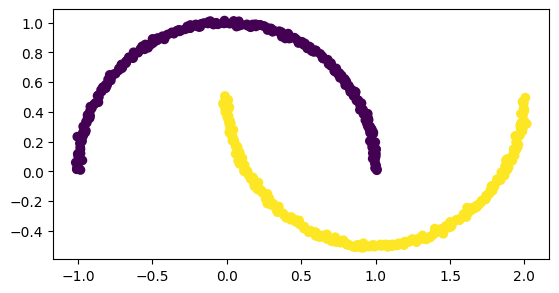

In [4]:
random_state = 17
n_samples = 500
X, y = make_moons(n_samples=n_samples, noise=0.01, random_state=random_state)
#X, y = make_circles(n_samples=n_samples, noise=0.01, factor=0.3, random_state=random_state)
#X, y = make_blobs(n_samples=n_samples, centers=3, cluster_std=1.0, random_state=random_state)

fig, ax = plt.subplots()
_ = ax.scatter(X[:,0], X[:,1], c=y)
ax.set_aspect('equal')

In [18]:
def make_grid(n,X):
    """
        Generates a grid of points within the bounds of the given data.

        n : int
            The number of points along each dimension of the grid.
        X : numpy.ndarray
            A 2D array of shape (num_samples, 2) representing the input data.

        numpy.ndarray
            A 2D array of shape (n*n, 2) containing the grid points.
    """
    x_min, y_min = np.min(X, axis=0)
    x_max, y_max = np.max(X, axis=0)
    xy = np.mgrid[x_min:x_max:1j*n, y_min:y_max:1j*n].reshape(2,-1).T
    return xy

In [24]:
# Hyperparameters (to be tuned)
kernel = 'gaussian' # test 'linear' or 'gaussian'
sigma = 0.14   # after several tries 0.14 seems to be good
lbda = 0.1

# Define kernel
if kernel == 'linear':
    kernel = LinearKernel()
elif kernel == 'gaussian':
    kernel = GaussianKernel(sigma = sigma)
else:
    raise ValueError('Unknown kernel')


def KPCA_representation(X):
    """
    Compute the finite-dimensional representation of the principal components.

    Parameters
    ----------
    X : (n, d) numpy.ndarray
        The input data.

    Returns
    -------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components.
    """
    # get the kernel matrix, center it, get the eigenvectors and eigenvalues, change the variables.
    Kxx = kernel.get_Kxx(X)
    Kxx_c = center_train_gram_matrix(Kxx)
    eigenvalues, eigenvectors = np.linalg.eigh(Kxx_c)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    #alpha = eigenvectors[:, :k] / np.sqrt(eigenvalues[:k])
    alpha = eigenvectors[:, :] / np.sqrt(eigenvalues[:])

    return alpha


In [25]:
def principal_component(alpha, X, Z):
    """
    return the evaluation of the principal components at points Z.

    Parameters
    ----------
    alpha : (n, k) numpy.ndarray
        The finite-dimensional representation of the principal components
    X: (n, d) numpy.ndarray
        The input data.
    Z : (m, d) array
        points to where to evaluate the principal components.

    Returns
    -------
    (k, m) array
        value of the k principal components at points y.
    """
    Kxx = kernel.get_Kxx(X)
    Kxz = kernel.get_Kxz(X,Z)
    Kxz_c = center_test_gram_matrix(Kxx, Kxz)
    return alpha.T @ Kxz_c

In [26]:
n_eval = 200
Z = make_grid(n_eval, X)

alpha = KPCA_representation(X)
principal_component_fn = lambda E: principal_component(alpha, X, E)
feval = principal_component_fn(Z)
fself = principal_component_fn(X)

<ipython-input-24-55cba2002fbc>:39: RuntimeWarning: invalid value encountered in sqrt
  alpha = eigenvectors[:, :] / np.sqrt(eigenvalues[:])


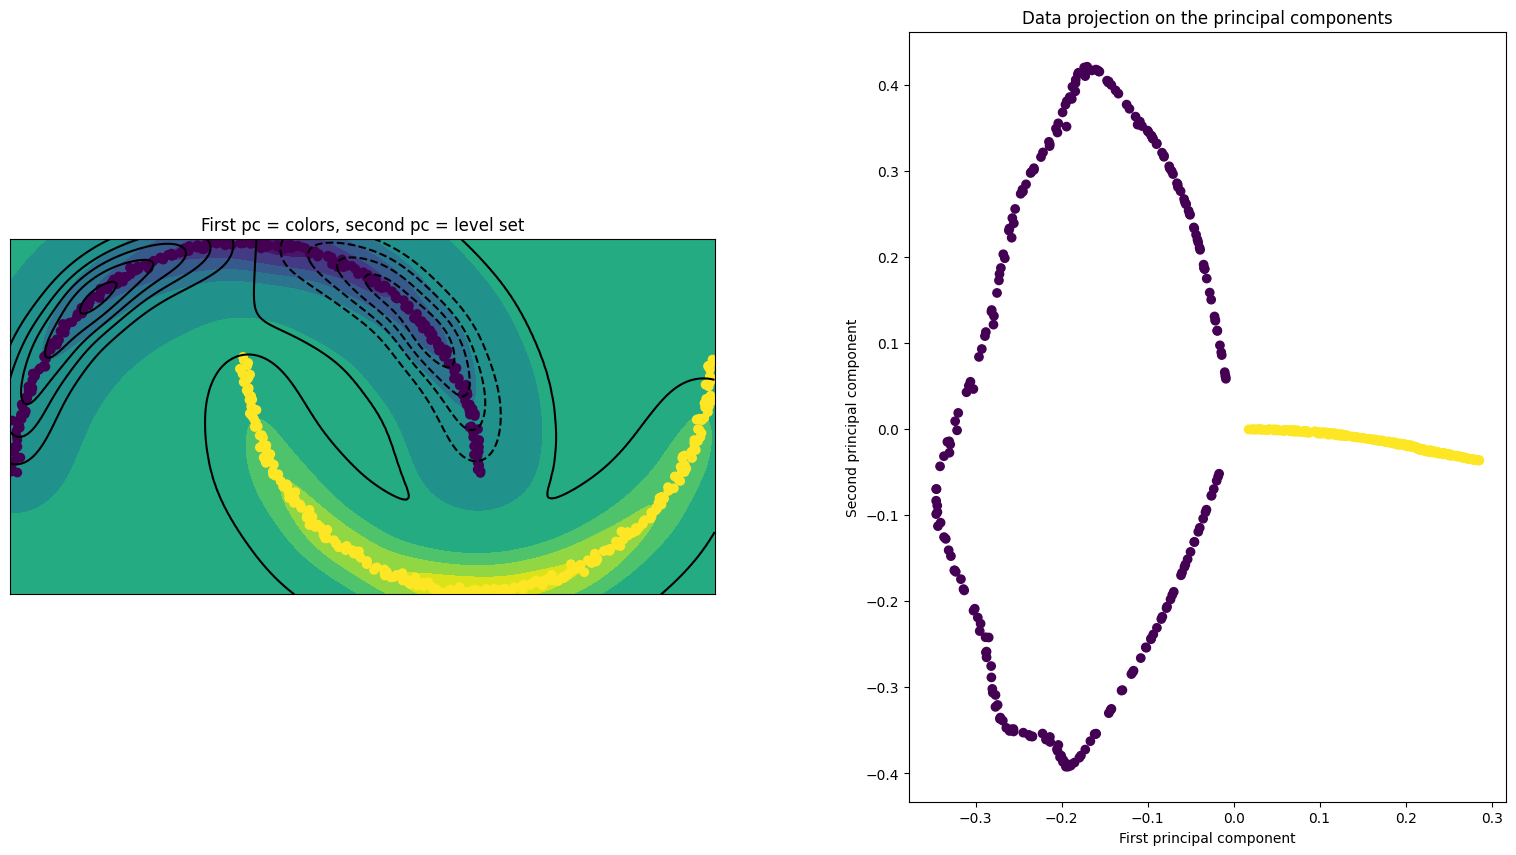

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
Ep = Z.T.reshape((2, n_eval, n_eval))
fxp = feval.reshape((feval.shape[0], n_eval, n_eval))
_ = ax1.contourf(Ep[0], Ep[1], fxp[0])
_ = ax1.contour(Ep[0], Ep[1], fxp[1], colors='black', levels=12 )
_ = ax1.scatter(X[:,0], X[:,1], c=y)
ax2.scatter(fself[0], fself[1], c=y)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
#ax2.xaxis.set_visible(False)
#ax2.yaxis.set_visible(False)
ax1.set_aspect('equal')
ax2.set_aspect('equal')
ax1.set_title('First pc = colors, second pc = level set')
ax2.set_title('Data projection on the principal components')
ax2.set_xlabel('First principal component')
ax2.set_ylabel('Second principal component')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()


## Solving Regression under contamination

In real-world problems, it is not rare to observe outliers in collected data. For instance, this happens when a sensor has a default or faces some specific event such as an accident. In statistics, Huber (1964) proposed to describe this kind of situation with the framework of contamination. A data is polluted by a mixture of a (classic) Gaussian noise with a small variance and an arbitray distribution that represent contaminations. In this practical session, we propose to study regression under contamination, meaning that the output training data are contaminated as follows:

\begin{equation*}
y_i = f^*(x_i) + \delta_i \epsilon_i + ( 1 - \delta_i) u_i,
\end{equation*}
where $\epsilon_i \sim \mathcal{N}(0,\sigma^2)$ is a Gaussian noise, $\delta_i \sim \mathcal{B}(p)$ is a Bernoulli variable, with $0 < p < 1$
and $u_i \sim Un([-b,+b])$, with $b > 0$, is a uniform variable.


We consider the general regression problem with a RKHS $\mathcal{H}_k$.
The **representer theorem** garantees that the solution of any problem of the form

\begin{equation*}
\min_{f\in \mathcal{H}_k} \frac{1}{n}\sum_{i=1}^n \ell(f(x_i),y_i) + \lambda ||f||^2_{\mathcal{H}_k}
\end{equation*}

Can be written as

\begin{equation*}
\hat{f} = \sum_{i=1}^n \alpha_i \phi(x_i)
\end{equation*}

i.e.

\begin{equation*}
\hat{f}(x) = \sum_{i=1}^n \alpha_i k(x,x_i)
\end{equation*}

Meaning that finding the best function in $\mathcal{H}_k$ (which is infinite) is equivalent to find the right $\alpha \in \mathbb{R}^n$ !



Q6) Define a simple toy problem with $x$ and $y$ $\in \mathbb{R}$. For that, define a simple toy function $f^*$. Write the code to generate i.i.d. contaminated datasets $\{(x_i,y_i)\}_{i=1}^n$ for different values of $p$, $\sigma$ and $b$ for both training and test.

### **Answer:**

I define a simple toy problem for regression in a contaminated setting. Our input data points $ x_i $ are sampled independently from a uniform distribution on the interval $[-1, 1]$:

$$
x_i \sim \mathcal{U}([-1, 1])
$$

I choose the target function $ f^* $ as a simple nonlinear function:

$$
f^*(x) = \sin(2\pi x)
$$

<ipython-input-10-5a5c1e7eed0c>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train, y_train, cmap='coolwarm', label='y contaminated')


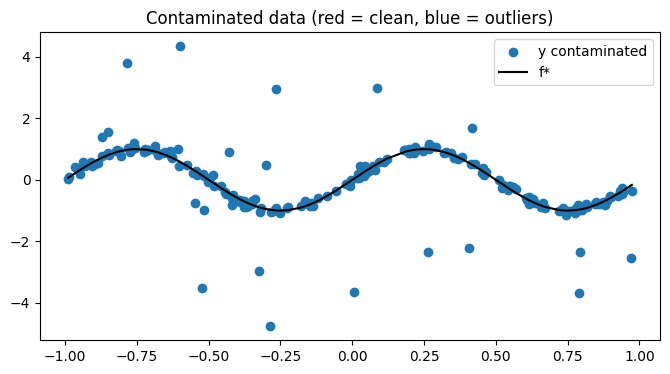

In [10]:
def f_star(x):
    return np.sin(2 * np.pi * x)

def generate_contaminated_data(n=200, p=0.8, sigma=0.1, b=5.0, seed=None):
    if seed is not None:
        np.random.seed(seed)    # to control randomness

    x = np.random.uniform(-1, 1, size=n)
    y_true = f_star(x)

    epsilon = np.random.normal(0, sigma, size=n)
    u = np.random.uniform(-b, b, size=n)
    delta = np.random.binomial(1, p, size=n)

    y = y_true + delta * epsilon + (1 - delta) * u

    return x, y

x_train, y_train = generate_contaminated_data(p=0.9, sigma=0.1, b=4.0, seed=42)

plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, cmap='coolwarm', label='y contaminated')
plt.plot(np.sort(x_train), f_star(np.sort(x_train)), color='black', label='f*')
plt.title("Contaminated data (red = clean, blue = outliers)")
plt.legend()
plt.show()

Q7) Loss functions are not equal with respect to output contaminations. Consider the square loss $\ell_{square}(y,f(x)):= (y - f(x))^2$ and solve the so-called Kernel Ridge Regression problem. You can use the closed form solution (implement it) or the stochastic Gradient descent implementation of scikitlearn.

### **Answer:**

By the representer theorem, the solution $ f \in \mathcal{H}_k $ can be written as:

$$
f(x) = \sum_{j=1}^n \alpha_j k(x, x_j)
$$

The optimization problem becomes:

$$
\min_{\boldsymbol{\alpha} \in \mathbb{R}^n} \frac{1}{n} \| \mathbf{y} - K \boldsymbol{\alpha} \|^2 + \lambda \boldsymbol{\alpha}^\top K \boldsymbol{\alpha}
$$
cf question 3)

Denote:

$$
g(\alpha) = \frac{1}{n} \| y - K \alpha \|^2 + \lambda \alpha^T K \alpha
$$

$$
g(\alpha) = \frac{1}{n} \langle y - K \alpha, y - K \alpha \rangle + \lambda \alpha^T K \alpha
$$

Searching for $\nabla g(\alpha)$:

$$
g(\alpha + h) = g(\alpha) - \frac{2}{n} \langle y - K \alpha, K h \rangle + 2 \lambda \alpha^T K h + o(\|h\|^2)
$$

$$
= g(\alpha) + \left\langle \frac{2}{n} K^T(K \alpha - y) + 2 \lambda K \alpha, h \right\rangle + o(\|h\|^2)
$$

$$
= g(\alpha) + \langle \nabla g(\alpha), h \rangle + o(\|h\|^2)
$$

with $\nabla g(\alpha) = \frac{2}{n} K^T(K \alpha - y) + 2 \lambda K \alpha$

Solving for the optimum:

$$
\nabla g(\alpha) = 0
$$

$$
\frac{1}{n} K^T(K \alpha - y) + \lambda K \alpha = 0
$$

Since $ K $ is symmetric ($ K^\top = K $):

$$
K (K + n \lambda I) \boldsymbol{\alpha} = K \mathbf{y}
$$

Since $ K $ is positive semi-definite, we can left-multiply both sides by $ K^{-1} $:

$$
(K + n \lambda I) \boldsymbol{\alpha} = \mathbf{y}
$$

Hence, the closed-form solution is:

$$
\boxed{
\boldsymbol{\alpha} = (K + n \lambda I)^{-1} \mathbf{y}
}
$$

#### Prediction

Given a new point $ x $, we can predict its output with:

$$
f(x) = \sum_{i=1}^n \alpha_i k(x, x_i) = \boldsymbol{\alpha}^\top k_x
$$

---
We can also implement the solution.

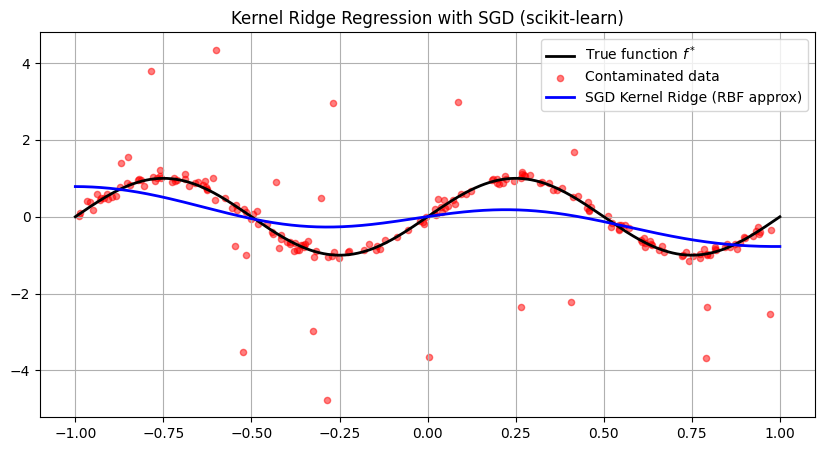

In [11]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

x_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_true_test = f_star(x_test)

scaler = StandardScaler()
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rbf = RBFSampler(gamma=1.0, n_components=500, random_state=42)
x_train_features = rbf.fit_transform(x_train_scaled)
x_test_features = rbf.transform(x_test_scaled)

model = SGDRegressor(loss="squared_error", penalty="l2", alpha=1e-2, max_iter=1000, random_state=42)
model.fit(x_train_features, y_train)

y_pred = model.predict(x_test_features)

plt.figure(figsize=(10, 5))
plt.plot(x_test, y_true_test, label="True function $f^*$", color="black", linewidth=2)
plt.scatter(x_train, y_train, color="red", s=20, label="Contaminated data", alpha=0.5)
plt.plot(x_test, y_pred, label="SGD Kernel Ridge (RBF approx)", color="blue", linewidth=2)
plt.title("Kernel Ridge Regression with SGD (scikit-learn)")
plt.legend()
plt.grid(True)
plt.show()

Q8) Evaluate the performance of KRR on a test set for different contaminated training sets.

p = 1.00 ➤ Test MSE: 0.2326
p = 0.90 ➤ Test MSE: 0.2278
p = 0.70 ➤ Test MSE: 0.2820
p = 0.50 ➤ Test MSE: 0.2979
p = 0.30 ➤ Test MSE: 0.2835


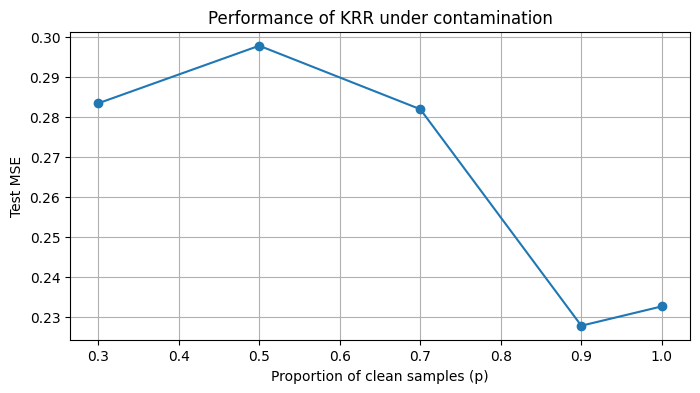

In [12]:
from sklearn.metrics import mean_squared_error

x_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_test_true = f_star(x_test)

gamma = 1.0
alpha = 1e-2
n_components = 500

p_list = [1.0, 0.9, 0.7, 0.5, 0.3]
mse_list = []

for p in p_list:
    x_train, y_train = generate_contaminated_data(p=p, sigma=0.1, b=5.0, seed=42)

    scaler = StandardScaler()
    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    rbf = RBFSampler(gamma=gamma, n_components=n_components, random_state=42)
    x_train_features = rbf.fit_transform(x_train_scaled)
    x_test_features = rbf.transform(x_test_scaled)

    model = SGDRegressor(loss="squared_error", penalty="l2", alpha=alpha, max_iter=1000, random_state=42)
    model.fit(x_train_features, y_train)

    y_pred = model.predict(x_test_features)
    mse = mean_squared_error(y_test_true, y_pred)
    mse_list.append(mse)

    print(f"p = {p:.2f} ➤ Test MSE: {mse:.4f}")

plt.figure(figsize=(8, 4))
plt.plot(p_list, mse_list, marker='o')
plt.xlabel("Proportion of clean samples (p)")
plt.ylabel("Test MSE")
plt.title("Performance of KRR under contamination")
plt.grid(True)
plt.show()

### **Observation:**

As the proportion of clean samples p decreases, the test MSE steadily increases, indicating that Kernel Ridge Regression is sensitive to output contamination. However, the model remains relatively robust when the noise is limited (e.g. p≥0.9).

---

Q10) Let us consider the so-called $\epsilon$-insensitive loss:
   $$\ell_{\epsilon}(y,f(x)):= \max(0, |y - f(x)| -\epsilon)$$
Solve the Support Vector regression problem using this loss and squared norm penalty. There exist two ways to solve this problem: either i) you notice that the problem wriets as a convex programme with affine inequality constraint and dualize the problem (at some point we ned to use functional derivative of $f$ when deploying KKT), or ii) apply representer theorem and write the primal problem with $\alpha \in \mathbb{R}^n$. Introduce slack variables for the two types of errors (positive and negative): $\xi^+ \in \mathbb{R}^n$ and $\xi^- \in \mathbb{R}^n$. Then apply Lagrangian relaxation (KKT conditions) and write the problem  in the dual space. Choose one of the other way (split the classroom in two). Any way this leads to Support Vector Regression.
    

### **Answer:**

I am going to use method ii).
The goal of Support Vector Regression (SVR) is to find a function $f \in \mathcal{H}_k$ minimizing:

$$
\frac{1}{2} \| f \|_{\mathcal{H}_k}^2 + C \sum_{i=1}^n \ell_\epsilon(y_i, f(x_i))
$$

### Primal Problem (with slack variables)

To handle the $\epsilon$-insensitive loss, we introduce two slack variables per point:

- $\xi_i^+ \geq 0$ for exceeding $y_i - f(x_i) > \epsilon$
- $\xi_i^- \geq 0$ for exceeding $f(x_i) - y_i > \epsilon$

The primal becomes:

$$
\begin{aligned}
\min_{f \in \mathcal{H}_k, \ \xi_i^+, \xi_i^- \geq 0} \quad & \frac{1}{2} \| f \|_{\mathcal{H}_k}^2 + C \sum_{i=1}^n (\xi_i^+ + \xi_i^-) \\
\text{subject to:} \quad
& y_i - f(x_i) \leq \epsilon + \xi_i^+ \\
& f(x_i) - y_i \leq \epsilon + \xi_i^-
\end{aligned}
$$

By the representer theorem, the solution takes the form:

$$
f(x) = \sum_{j=1}^n \alpha_j k(x_j, x)
$$

### Dual Problem

Using Lagrangian duality and KKT conditions, we can write the dual of the SVR problem as:

$$
\begin{aligned}
\max_{\alpha_i^+, \alpha_i^- \in [0, C]} \quad & -\frac{1}{2} \sum_{i,j=1}^n (\alpha_i^+ - \alpha_i^-)(\alpha_j^+ - \alpha_j^-) k(x_i, x_j) \\
& - \epsilon \sum_{i=1}^n (\alpha_i^+ + \alpha_i^-) + \sum_{i=1}^n y_i (\alpha_i^+ - \alpha_i^-) \\
\text{subject to:} \quad
& \sum_{i=1}^n (\alpha_i^+ - \alpha_i^-) = 0
\end{aligned}
$$


The final regression function is given by:

$$
f(x) = \sum_{i=1}^n (\alpha_i^+ - \alpha_i^-) k(x_i, x)
$$

Only the support vectors (those for which $0 < \alpha_i^+ < C$ or $0 < \alpha_i^- < C$) contribute to the sum.

---

Q11) First study the behaviour of SVR depending on the choice of the hyperparameters $\epsilon$ and $\lambda$ on the toy problem without contaminations ($\delta_i=1$ is a dterminstic and constant.)

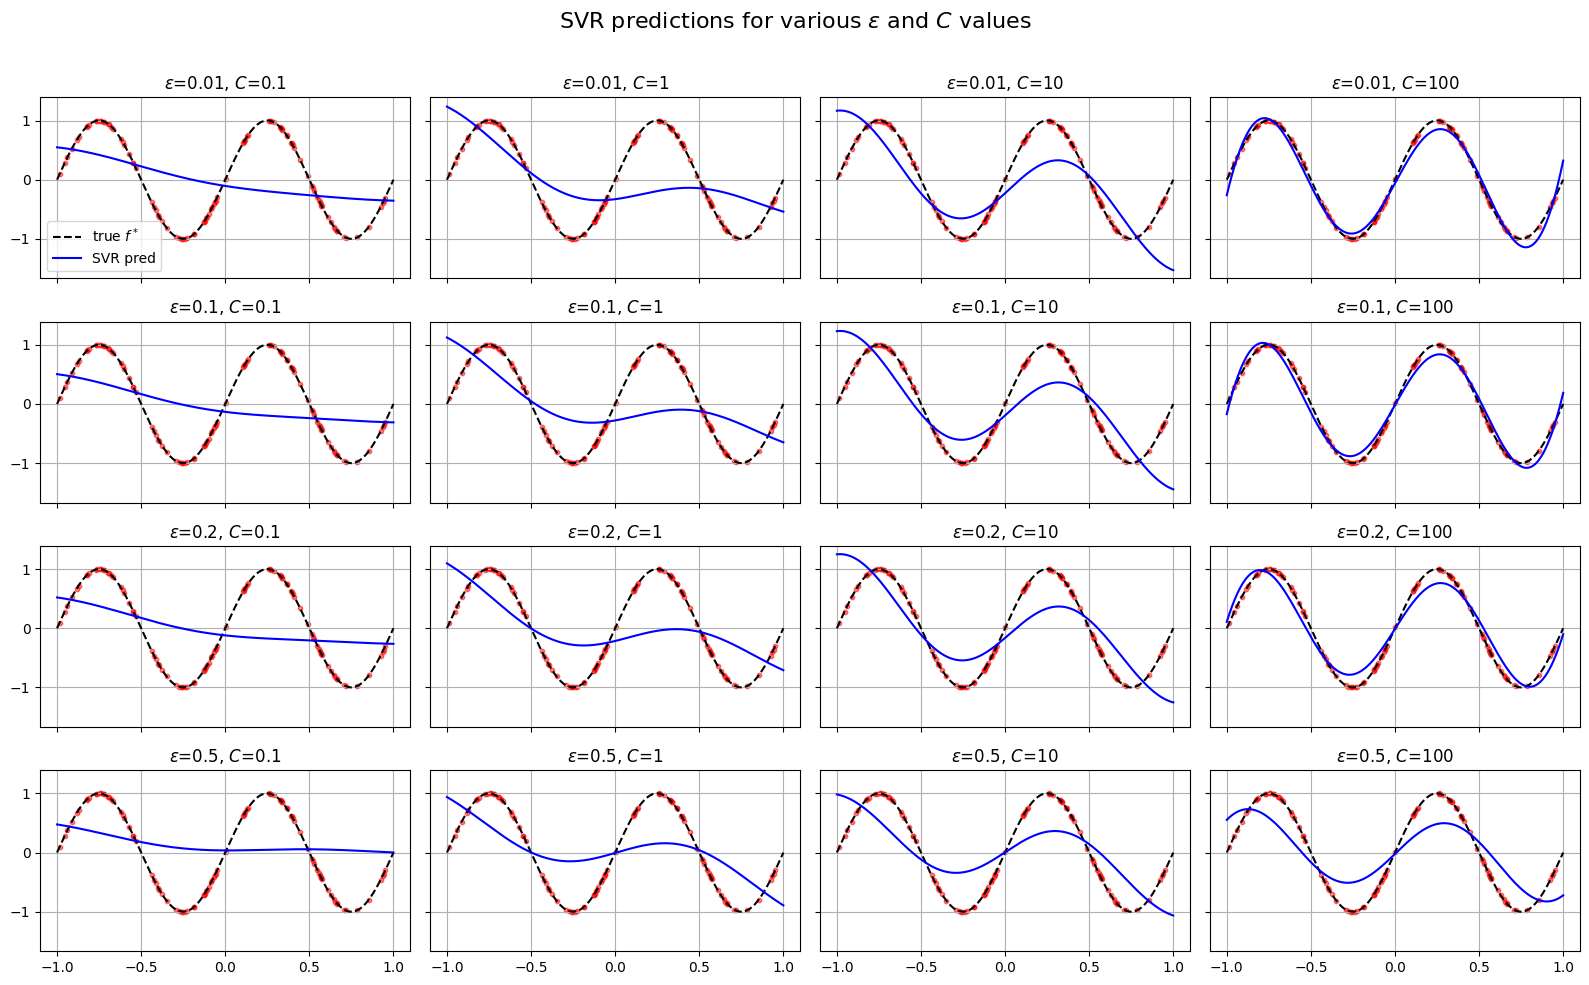

In [13]:
from sklearn.svm import SVR

def generate_clean_data(n=100, seed=0):
    rng = np.random.default_rng(seed)
    x = rng.uniform(-1, 1, size=n)
    y = f_star(x)
    return x.reshape(-1, 1), y

x_train, y_train = generate_clean_data(n=100, seed=42)
x_test = np.linspace(-1, 1, 500).reshape(-1, 1)
y_test = f_star(x_test)

epsilon_list = [0.01, 0.1, 0.2, 0.5]
C_list = [0.1, 1, 10, 100]

fig, axs = plt.subplots(len(epsilon_list), len(C_list), figsize=(16, 10), sharex=True, sharey=True)

for i, eps in enumerate(epsilon_list):
    for j, C in enumerate(C_list):
        model = SVR(kernel='rbf', C=C, epsilon=eps, gamma=1.0)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        ax = axs[i, j]
        ax.plot(x_test, y_test, 'k--', label="true $f^*$")
        ax.plot(x_test, y_pred, 'b', label="SVR pred")
        ax.scatter(x_train, y_train, color='red', s=10, alpha=0.5)
        ax.set_title(f"$\\epsilon$={eps}, $C$={C}")
        ax.grid(True)

axs[0, 0].legend(loc="lower left")
fig.suptitle("SVR predictions for various $\\epsilon$ and $C$ values", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### **Observation:**

As $\epsilon$ increases, the SVR ignores small errors and gives smoother predictions. A higher $C$ makes the model follow the training data more closely.

---

Q12) Now, use the result of Q6) to evaluate performance of SVR as compared to KKR on contaminated distributions.
What can you say about the behaviour of SVR.

### **Answer:**

Both KRR and SVR can fit clean data well. Yet, under contamination, their behaviors differ significantly.
KRR, using the squared loss, is very sensitive to outliers and tends to overfit corrupted labels, leading to high test error.
In contrast, SVR with an $\epsilon$-insensitive loss is more robust. Indeed, it ignores small errors and limits the influence of extreme outliers, producing smoother and more accurate predictions.

---